In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Hemanthkaruturi/python_for_datascience/master/data/stats_data.csv')

In [ ]:
data.head()

,ID Num,Gender,Age,Height,Class,Major,Grad School,GPA,Expected Salary,Annual Salary in 5 Years,Employment Status,Number of Affiliations,Satisfaction Advisement,Spending
0,ID01,m,19.0,69.0,so,mr,y,3.19,40.0,70.0,un,0.0,2.0,550.0
1,ID02,m,21.0,67.0,sr,m,un,3.11,50.0,60.0,pt,0.0,2.0,400.0
2,ID03,m,20.0,68.0,jr,ef,n,3.02,50.0,60.0,pt,0.0,5.0,450.0
3,ID04,m,18.0,79.0,fr,ef,y,4.00,50.0,57.0,pt,0.0,5.0,360.0
4,ID05,m,19.0,67.0,so,m,y,2.75,40.0,100.0,pt,1.0,1.0,500.0


In [ ]:
data = data.dropna()

In [ ]:
# sample mean
np.sum(data['Age']) / (len(data['Age'])-1)

21.387755102040817

In [ ]:
# Population mean
np.mean(data['Age'])

20.96

In [ ]:
np.median(data['Age'])

20.0

In [ ]:
from scipy.stats import mode
mode(data['Gender'])

ModeResult(mode=array(['m'], dtype=object), count=array([26]))

In [ ]:
mode(data['Gender'])[0][0]

'm'

In [ ]:
# populaion
np.var(data['Age'])

10.958400000000006

In [ ]:
# sample
np.var(data['Age'], ddof=1)

11.182040816326536

In [ ]:
# population
np.std(data['Age'])

3.310347413792094

In [ ]:
# sample
np.std(data['Age'], ddof=1)

3.343955863393914

In [ ]:
# coefficient of variation
np.std(data['Age']) / np.mean(data['Age'])

0.15793642241374495

In [ ]:
print(np.min(data['Age']))
print(np.max(data['Age']))
print(np.max(data['Age']) - np.min(data['Age']))

18.0
36.0
18.0


In [ ]:
data['Age'].quantile(0.25)

19.0

In [ ]:
data['Age'].quantile(0.50)

20.0

In [ ]:
data['Age'].quantile(0.75)

21.0

In [ ]:
data['Age'].quantile(0.75) - data['Age'].quantile(0.25)

2.0

In [ ]:
# zscore
from scipy.stats import zscore
zscore(data['Age'])

array([-0.59208287,  0.01208332, -0.28999977, -0.89416597, -0.59208287,
        0.01208332, -0.28999977,  0.01208332, -0.28999977, -0.59208287,
        4.54332978, -0.59208287, -0.28999977,  0.01208332, -0.59208287,
       -0.28999977, -0.59208287, -0.28999977,  0.61624952, -0.28999977,
       -0.28999977, -0.59208287, -0.59208287, -0.28999977,  0.31416642,
        0.01208332,  0.01208332,  2.7308312 , -0.28999977,  0.91833262,
       -0.59208287,  3.63708049, -0.59208287, -0.28999977,  0.31416642,
        0.01208332, -0.59208287,  0.01208332, -0.28999977, -0.28999977,
       -0.59208287,  0.01208332, -0.28999977, -0.59208287,  0.31416642,
        0.01208332,  0.31416642, -0.59208287, -0.28999977, -0.28999977])

In [ ]:
# CI
from scipy import stats


In [ ]:
stats.t.interval(alpha=0.95, df=len(data['Age'])-1, loc=np.mean(data['Age']), scale=stats.sem(data['Age']))

(20.00965825995543, 21.910341740044572)

In [ ]:
# hypothesis testing
## one sample test
sample1 = np.random.randint(1,100, (40,))

In [ ]:
sample1

array([29, 29, 38, 90, 34, 41, 20, 46, 24, 37, 19, 35, 63, 96, 25, 15, 45,
        6, 90, 82, 89, 35, 12, 84, 63, 56, 32, 96, 82, 31, 76, 79, 68, 80,
        2, 42, 78, 12, 39, 44])

In [ ]:
# H0: mean(s1) = 50
# H1: mean(s2) != 50

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest_1samp(sample1, popmean=50, alternative='greater')

Ttest_1sampResult(statistic=-0.20365059627026894, pvalue=0.8396854735363676)

In [ ]:
t_stat, pvalue = ttest_1samp(sample1, popmean=50)

In [ ]:
t_stat

-0.20365059627026894

In [ ]:
pvalue

0.8396854735363676

In [ ]:
if pvalue > 0.05:
  print('Accpet null hypothesis')
else:
  print('Reject null hypothesis')

Accpet null hypothesis


In [ ]:
# critical value approach
t_crit = stats.t.ppf(0.025, len(sample1)-1)

In [ ]:
t_crit

-2.0226909117347285

## Z test - One sample proportions

In [ ]:
# z test - one sample 
data.head()

,ID Num,Gender,Age,Height,Class,Major,Grad School,GPA,Expected Salary,Annual Salary in 5 Years,Employment Status,Number of Affiliations,Satisfaction Advisement,Spending
0,ID01,m,19.0,69.0,so,mr,y,3.19,40.0,70.0,un,0.0,2.0,550.0
1,ID02,m,21.0,67.0,sr,m,un,3.11,50.0,60.0,pt,0.0,2.0,400.0
2,ID03,m,20.0,68.0,jr,ef,n,3.02,50.0,60.0,pt,0.0,5.0,450.0
3,ID04,m,18.0,79.0,fr,ef,y,4.00,50.0,57.0,pt,0.0,5.0,360.0
4,ID05,m,19.0,67.0,so,m,y,2.75,40.0,100.0,pt,1.0,1.0,500.0


In [ ]:
# H0: males are 50%
# H1: males are not 50%

In [ ]:
data['Gender'].value_counts()

m    26
f    24
Name: Gender, dtype: int64

In [ ]:
num_of_males = data['Gender'].value_counts()[0]

In [ ]:
sample_size = len(data['Age'])

In [ ]:
null_hypothesis = 0.50

In [ ]:
significance = 0.05

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
proportions_ztest(count=num_of_males, nobs=sample_size, value=null_hypothesis)

(0.28306925853614917, 0.7771237463572622)

In [ ]:
z_stat, pvalue = proportions_ztest(count=num_of_males, nobs=sample_size, value=null_hypothesis)

In [ ]:
if pvalue > significance:
  print('Accpet null hypothesis')
else:
  print('Reject null hypothesis')

Accpet null hypothesis


In [ ]:
# z critical
stats.norm.ppf(0.025)

-1.9599639845400545

## Two sample t test

In [ ]:
sample1 = np.random.randint(1,100, (20,))
sample2 = np.random.randint(1,100, (20,))

In [ ]:
# H0: s1 = s2
# H1: s1 != s2

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.9164021202569076, pvalue=0.36523546935473716)

In [ ]:
t_stat, pvalue = ttest_ind(sample1, sample2)

In [ ]:
if pvalue > 0.05:
  print('Accpet null hypothesis')
else:
  print('Reject null hypothesis')

Accpet null hypothesis


## compare means of two relation samples

In [ ]:
sample1 = np.random.randint(1,100, (20,))
sample2 = np.random.randint(1,100, (20,))

In [ ]:
sample3 = sample1-sample2
# H0: mean(s3) = 0
# H1: mean(s3) != 0

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
ttest_rel(sample1, sample2)

Ttest_relResult(statistic=-1.1089720927968878, pvalue=0.2812824389348724)

In [ ]:
if pvalue > 0.05:
  print('Accpet null hypothesis')
else:
  print('Reject null hypothesis')

Accpet null hypothesis


## compare the proportions of 2 independent samples

In [ ]:
sample_data =data.iloc[np.random.randint(1, len(data), (20,)), :]

In [ ]:
data.head()

,ID Num,Gender,Age,Height,Class,Major,Grad School,GPA,Expected Salary,Annual Salary in 5 Years,Employment Status,Number of Affiliations,Satisfaction Advisement,Spending
0,ID01,m,19.0,69.0,so,mr,y,3.19,40.0,70.0,un,0.0,2.0,550.0
1,ID02,m,21.0,67.0,sr,m,un,3.11,50.0,60.0,pt,0.0,2.0,400.0
2,ID03,m,20.0,68.0,jr,ef,n,3.02,50.0,60.0,pt,0.0,5.0,450.0
3,ID04,m,18.0,79.0,fr,ef,y,4.00,50.0,57.0,pt,0.0,5.0,360.0
4,ID05,m,19.0,67.0,so,m,y,2.75,40.0,100.0,pt,1.0,1.0,500.0


In [ ]:
sample_data.head()

,ID Num,Gender,Age,Height,Class,Major,Grad School,GPA,Expected Salary,Annual Salary in 5 Years,Employment Status,Number of Affiliations,Satisfaction Advisement,Spending
45,ID46,m,21.0,68.0,jr,m,n,2.42,35.0,60.0,pt,1.0,3.0,450.0
13,ID14,f,21.0,65.0,jr,mr,y,2.94,40.0,60.0,pt,0.0,4.0,600.0
5,ID06,m,21.0,70.0,jr,a,y,3.24,60.0,100.0,pt,2.0,5.0,650.0
3,ID04,m,18.0,79.0,fr,ef,y,4.00,50.0,57.0,pt,0.0,5.0,360.0
30,ID31,f,19.0,69.0,so,mr,un,2.87,30.0,50.0,pt,0.0,3.0,700.0


In [ ]:
# H0: proportions of male is same in both samples
# H1: proportions of male is not same in both samples

In [ ]:
male_sample_a, male_sample_b = data['Gender'].value_counts()[0], sample_data['Gender'].value_counts()[0]
sample_size_a, sample_size_b = len(data['Gender']), len(sample_data['Gender'])

In [ ]:
man_samples = np.array([male_sample_a, male_sample_b])
sample_sizes = np.array([sample_size_a, sample_size_b])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
stats, pvalue = proportions_ztest(count=man_samples, nobs=sample_sizes, alternative='two-sided' )

In [ ]:
if pvalue > 0.05:
  print('Accpet null hypothesis')
else:
  print('Reject null hypothesis')

Accpet null hypothesis


### Compare variance of 2 samples

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sample1 = np.random.randint(1,100, (20,))
sample2 = np.random.randint(1,100, (20,))

In [ ]:
f_stat = np.var(sample1, ddof=1) / np.var(sample2, ddof=2)

In [ ]:
f_stat

0.8364039171607458

In [ ]:
from scipy import stats
f_crit = stats.f.ppf(q=0.025, dfn = len(sample1)-1, dfd = len(sample2)-1)

In [ ]:
if f_stat > f_crit:
  print("reject null hypothesis")
else:
  print('accept null hypothesis')

reject null hypothesis


In [ ]:
pvalue = 1-stats.f.cdf(f_stat, dfn = len(sample1)-1, dfd = len(sample2)-1)

In [ ]:
if pvalue > 0.05:
  print("Accept null hypothesis")
else:
  print("Reject null hypothesis")

Accept null hypothesis


# Anova

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Hemanthkaruturi/python_for_datascience/master/data/stats_data.csv')

In [ ]:
data.head()

,ID Num,Gender,Age,Height,Class,Major,Grad School,GPA,Expected Salary,Annual Salary in 5 Years,Employment Status,Number of Affiliations,Satisfaction Advisement,Spending
0,ID01,m,19.0,69.0,so,mr,y,3.19,40.0,70.0,un,0.0,2.0,550.0
1,ID02,m,21.0,67.0,sr,m,un,3.11,50.0,60.0,pt,0.0,2.0,400.0
2,ID03,m,20.0,68.0,jr,ef,n,3.02,50.0,60.0,pt,0.0,5.0,450.0
3,ID04,m,18.0,79.0,fr,ef,y,4.00,50.0,57.0,pt,0.0,5.0,360.0
4,ID05,m,19.0,67.0,so,m,y,2.75,40.0,100.0,pt,1.0,1.0,500.0


In [ ]:
data = data.dropna()

In [ ]:
data[['Gender', 'GPA']].groupby('Gender').mean()

,GPA
Gender,
f,3.142917
m,3.103462


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
model = ols("GPA ~ C(Gender)", data).fit()

In [ ]:
annova_table = anova_lm(model)

In [ ]:
annova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,0.019428,0.019428,0.11945,0.731142
Residual,48.0,7.806884,0.162643,NaN,NaN


In [ ]:
f_stat = annova_table['F'][0]
print(f_stat)

0.11944968196421181


In [ ]:
from scipy import stats
f_crit = stats.f.ppf(q=0.05/2, dfn=1, dfd=1)

In [ ]:
if f_stat > f_crit:
  print("reject null hypothesis")
else:
  print('accept null hypothesis')

reject null hypothesis


In [ ]:
# find the pvalue
from scipy import stats
#pvalue = stats.f.cdf()

### Chi-square

In [ ]:
data.head()

,ID Num,Gender,Age,Height,Class,Major,Grad School,GPA,Expected Salary,Annual Salary in 5 Years,Employment Status,Number of Affiliations,Satisfaction Advisement,Spending
0,ID01,m,19.0,69.0,so,mr,y,3.19,40.0,70.0,un,0.0,2.0,550.0
1,ID02,m,21.0,67.0,sr,m,un,3.11,50.0,60.0,pt,0.0,2.0,400.0
2,ID03,m,20.0,68.0,jr,ef,n,3.02,50.0,60.0,pt,0.0,5.0,450.0
3,ID04,m,18.0,79.0,fr,ef,y,4.00,50.0,57.0,pt,0.0,5.0,360.0
4,ID05,m,19.0,67.0,so,m,y,2.75,40.0,100.0,pt,1.0,1.0,500.0


In [ ]:
cross_table = pd.crosstab(data['Gender'], data['Grad School'])

In [ ]:
cross_table

Grad School,n,un,y
Gender,,,
f,7,10,7
m,8,7,11


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, pvalue, ddof, expected = chi2_contingency(cross_table)

In [ ]:
pvalue

0.4947961421765693

In [ ]:
if pvalue > 0.05:
  print('Accpet null hypothesis')
else:
  print('Reject null hypothesis')

Accpet null hypothesis


In [ ]:
from scipy.stats import chi2
prob=0.95
chi_crit = chi2.ppf(prob,ddof)

In [ ]:
if stat >= chi_crit:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

accept null hypothesis


In [ ]:
# covariance
np.cov(sample1, sample2)[0][1]

-45.61052631578948

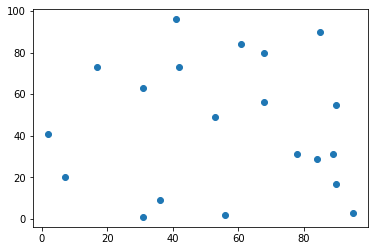

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(sample1, sample2)

In [ ]:
from scipy.stats import pearsonr
pearsonr(sample1, sample2)

(-0.0500742750301285, 0.8339404373995284)

In [ ]:
import scipy
scipy.__version__

'1.4.1'

In [ ]:
import statsmodels
statsmodels.__version__

'0.10.2'

In [ ]:
# 1 dataset > 